# PCA

Principal Components Analysis (PCA) is a dimensionality reduction algorithm that can be used to significantly speed up your unsupervised feature learning algorithm.

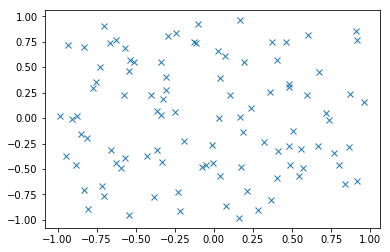

In [87]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=-1, upp=1):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

np.random.seed(42)

x1 = get_truncated_normal()
x1 = x1.rvs(100)
x2 = get_truncated_normal()
x2 = x2.rvs(100)
plt.plot(x1, x2, 'x')
plt.show()

In [88]:
y = np.c_[x1, x2].T
y.shape

(2, 100)

\begin{align}
\Sigma = \frac{1}{m} \sum_{i=1}^m (x^{(i)})(x^{(i)})^T. 
\end{align}

In [89]:
sigma = 1 / 100 * y.dot(y.T)
sigma

array([[ 0.30921983, -0.00779793],
       [-0.00779793,  0.29479197]])

In [90]:
w, v = np.linalg.eig(sigma)
v

array([[ 0.91626552,  0.40057147],
       [-0.40057147,  0.91626552]])

In [91]:
u1 = v.T[0]   # the principal direction of variation of the data
u2 = v.T[1]   # orthogonal to u1

In [104]:
## Change of basis

x = v.T.dot(y)
x[:2]
cov =  1/ 100 * x.dot(x.T)
cov

array([[3.12628915e-01, 2.44249065e-17],
       [2.44249065e-17, 2.91382881e-01]])

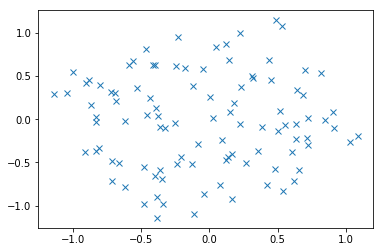

In [93]:
plt.plot(x[0, :], x[1, :], 'x')

In [94]:
pca = u1.T.dot(y)
pca[:10]

array([ 0.16824683,  0.70226979,  0.50335226,  0.14955945, -0.88189645,
       -0.39750198, -0.71502594,  0.43680161,  0.35247507,  0.65481888])

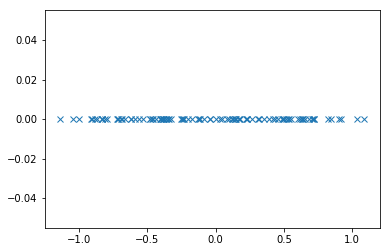

In [95]:
plt.plot(pca, np.zeros(100), 'x')

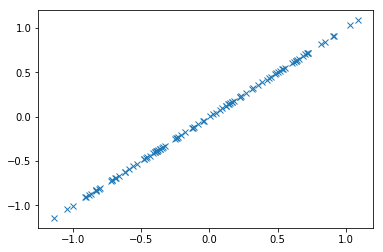

In [96]:
plt.plot(pca, pca, 'x')

In [97]:
## Get back original Data

orig = v.dot(y)
orig[:10]

array([[-0.5647507 ,  0.89101388,  0.24440359,  0.16130991, -0.26800686,
        -0.75249343, -0.8383725 ,  0.79913302, -0.03378774,  0.01211428,
        -1.01189201,  0.59449493,  0.88079284, -0.24890376, -0.43422009,
        -0.24882897, -0.09438436, -0.18750859,  0.18637385, -0.30764807,
         0.39800246, -0.31035329, -0.45994545, -0.50238819, -0.26274159,
         0.41644694, -0.26376167,  0.28781536, -0.2472785 , -0.79578202,
         0.11278647, -0.74581293, -1.04346077,  0.67968189,  1.1718815 ,
         0.38539153, -0.29941752, -0.54904856,  0.19948515,  0.27585401,
        -0.28120352, -0.18317721, -0.83318659,  0.56655064, -0.54064331,
        -0.10264419, -0.22498254,  0.03330842, -0.27276807, -0.67643728,
         1.14833474,  0.2638198 ,  0.51057401,  0.66837583,  0.53889799,
         0.54959892, -0.59066585, -0.31471473, -0.99232217, -0.11744446,
        -0.26703785, -0.2767067 ,  0.63847364, -0.20236468, -0.66087157,
         0.31115853, -0.72890516,  0.27081176, -1.0

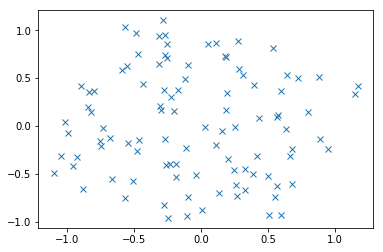

In [98]:
plt.plot(orig[0, :], orig[1, :], 'x')